## TIME-SERIES ANALYSIS 
<br>
Latihan analisis data deret waktu ini dilakukan untuk menampilkan hasil berupa prediksi harga di waktu yang akan datang (forecasting). Tahapan-tahapan yang dilakukan berupa mengindentifikasi plot ACF dan PACF, memilih model yang tepat berdasarkan plot tersebut, dan Information Criterion berupa Akaike & Bayesian. Semoga notebook ini bisa bermanfaat.

Import library yang diperlukan. Untuk dataset yang digunakan adalah dataset Harga Pangan Jakarta 2018 yang sudah dibersihkan. Untuk proses pembersihan data, terdapat pada notebook yang lain.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [75]:
df_pangan = pd.read_csv('pangan_clean.csv', index_col='tanggal', parse_dates= True)
print(df_pangan.head())

                                     komoditas   harga
tanggal                                               
2018-01-02                     beras medium/kg   11340
2018-01-02                       gula pasir/kg   13740
2018-01-02    minyak goreng bimoli botol/liter   14040
2018-01-02           minyak goreng curah/liter   12388
2018-01-02  daging sapi lokal paha belakang/kg  117660


In [76]:
df_pangan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9082 entries, 2018-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   komoditas  9082 non-null   object
 1   harga      9082 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 212.9+ KB


In [77]:
df_pangan.shape

(9082, 2)

In [78]:
df_pangan.isnull().sum()

komoditas    0
harga        0
dtype: int64

Persiapan selanjutnya adalah mengubah dataframe menjadi tabel pivot, untuk mengubah kolom berdasarka data baris non index.

In [79]:
pivot_pangan = df_pangan.pivot(columns = 'komoditas', values = 'harga')
pivot_pangan.head()

komoditas,ayam boiler/ekor,ayam kampung/ekor,bawang merah (medium)/kg,bawang putih impor (honan)/kg,bawang putih impor (kating)/kg,beras medium/kg,beras premium/kg,cabai merah besar/kg,cabai merah keriting/kg,cabai rawit hijau/kg,...,ketela pohon/kg,minyak goreng bimoli botol/liter,minyak goreng curah/liter,susu bubuk kaleng merk bendera/buah,susu bubuk kaleng merk indomilk/buah,susu kental manis kaleng merk bendera/buah,susu kental manis kaleng merk indomilk/buah,telur ayam kampung/butir,telur ayam ras/kg,tepung terigu segitiga biru/kg
tanggal,,,,,,,,,,,,,,,,,,,,,
2018-01-02,39740,55075,26800,25000,28560,11340,13340,37260,37140,34800,...,5060,14040,12388,43667,42000,12340,10300,2100,26150,10160
2018-01-03,38940,55075,27800,25000,30260,11440,13440,37260,38640,35300,...,5060,14240,12450,43667,42000,12240,10400,2150,26200,10360
2018-01-04,37440,53825,28400,27500,28660,11490,13490,39260,39340,41400,...,5060,14240,12575,43667,42000,11940,10600,2100,26300,9860
2018-01-05,36940,78825,27900,27500,28960,11740,13740,40260,42340,40400,...,4960,14040,12200,43667,42000,11940,10300,2120,26450,9610
2018-01-08,36940,77575,27900,27500,28960,11740,13740,40260,42340,40400,...,4960,13440,12200,43667,42000,11940,10300,2120,26450,9610


### Pemilihan Data Univariate

Kita akan mengambil data minyak goreng bimoli dan beras premium.
Proses selanjutnya reindex harian dan plot deret waktu, serta distribusinya.

In [80]:
#
pivot1 = pivot_pangan[['beras premium/kg', 'minyak goreng bimoli botol/liter']]
pivot1.tail()

komoditas,beras premium/kg,minyak goreng bimoli botol/liter
tanggal,,
2018-12-21,12437,13340
2018-12-26,12375,13240
2018-12-27,12700,13560
2018-12-28,12825,13560
2018-12-31,12825,13560


beras premium/kg                       AxesSubplot(0.125,0.125;0.352273x0.755)
minyak goreng bimoli botol/liter    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

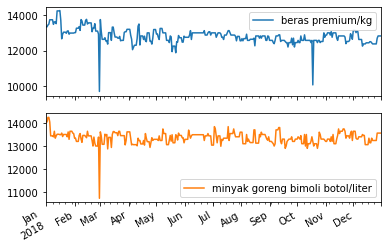

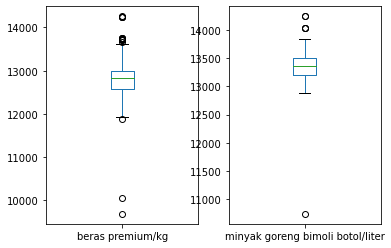

In [81]:
#Reindex dengan method backfill
pivot1 = pivot1.reindex(pd.date_range(start = '2018-01-01', end = '2018-12-31'),  method = 'bfill')

#Plot
pivot1.plot(subplots = True)
pivot1.plot(subplots = True, kind = 'box')

Berdasarkan plot di atas, kita dapat mengidentifikasi bahwa:
1. Kedua lineplot sama-sama bergerak dalam variasi yang relatif konstan, yang ditunjukkan dalam boxplot di bawahnya.
2. Distribusi nilai keduanya sama-sama memiliki outliers. 

Selanjutnya kita akan mencoba melakukan peramalan ARIMA

### Box-Jenkins

Merupakan tahapan dalam melakukan peramalan menggunakan model ARIMA. Pendekatan Box-Jenkins terdiri atas tiga tahapan yang dapat dilihat di gambar berikut ini:
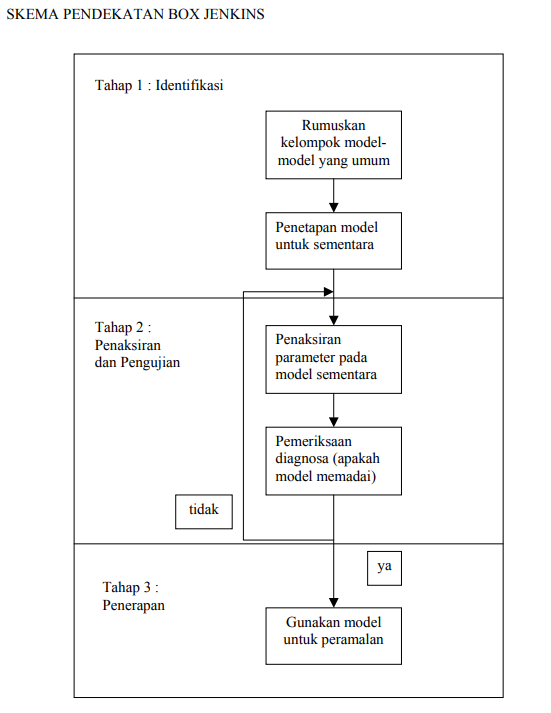

Dalam tahapan pertama, kita perlu melakukan identifikasi berupa data preprocessing, yakni mempersiapkan data sebelum dilakukannya proses, dengan hal ini adalah proses peramalan. 

#### Tahap Identifikasi
Proses identifikasi ini menggunakan data preprocessing untuk mendapatkan gambaran bagaimana nantinya model yang akan dibuat.

Tahapan preprocessing yang dilakukan yakni:
1. Cek stasioneritas data, yakni fluktuasi nilai dan variansi data cenderung konstan pada nilai rata-rata di setiap deret waktunya.
2. Apabila data belum stasioner, ada beberapa cara untuk menstasionerkan data, yaitu dengan melakukan differensiasi/menghitung perubahan nilai antar data hingga mencapai stasioneritas, atau melakukan transformasi logaritma pada setiap data pointnya. Jika data telah stasioner, tahapan ini tidak perlu dilakukan.
3. Melakukan plotting Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF). 
4. Membagi data point menjadi data training dan data test untuk proses validasi hasil prediksi yang dilakukan oleh model yang akan ditentukan nanti.


##### I. Uji Stasioneritas Data
Pengujian dapat dilakukan menggunakan tes Augmented Dickey-Fuller/ADFuller, salah satu unit root tes yang merupakan tes untuk menentukan seberapa kuat pengaruh tren terhadap nilai data point.

hipotesis null : Data point direpresentasikan oleh unit root yang menunjukkan ketidakstasioneran, sehingga nilainya tidak independen (p-value > taraf signifikansi).<br>
hipotesis alternatif : Menolak hipotesis null, data tidak memiliki unit root sehingga menunjukkan kestasioneran, dan nilainya independen (p-value <= taraf signifikansi).


In [82]:
#Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

#ADF test untuk beras premium
adf_test = adfuller(pivot1['beras premium/kg'])
print('Hasil tes ADF untuk beras premium')
print('ADF Statistic:', adf_test[0].round(5))
print('p-value:', adf_test[1].round(5))
print('Critical Values:')
for key, value in adf_test[4].items():
    #print('\t%s:%.5f' %(key, value))
    print(key, ':', value.round(5))

Hasil tes ADF untuk beras premium
ADF Statistic: -4.66684
p-value: 0.0001
Critical Values:
1% : -3.44859
5% : -2.86958
10% : -2.57105


In [83]:
#ADF test untuk bimoli
adf_test = adfuller(pivot1['minyak goreng bimoli botol/liter'])
print('Hasil tes ADF untuk bimoli')
print('ADF Statistic:', adf_test[0].round(5))
print('p-value:', adf_test[1].round(5))
print('Critical Values:')
for key, value in adf_test[4].items():
    #print('\t%s:%.5f' %(key, value))
    print(key, ':', value.round(5))

Hasil tes ADF untuk bimoli
ADF Statistic: -7.32628
p-value: 0.0
Critical Values:
1% : -3.44859
5% : -2.86958
10% : -2.57105


Berdasarkan hasil tes ADF di atas, kita mendapatkan <b>nilai negatif pada tes statistik ADF kedua data point, sehingga kemungkinan besar menolak hipotesis null</b>. Kita juga bisa melihat pada <b>p-value kedua data point yang bernilai 0, dan kurang dari taraf signifikansi</b>, sehingga dapat disimpulkan kedua data point bersifat stasioner, dan tidak perlu dilakukan transformasi data. 

##### II. ACF dan PACF
Tahapan selanjutnya adalah melakukan plot ACF dan PACF. ACF atau Autocorrelation Function adalah korelasi antar nilai dalam selisih waktu (lag). Konsep ACF ini mirip dengan korelasi Pearson dalam data bivariate. Sedangkan PACF juga menghitung korelasi antar nilai dalam selisih waktu, namun hanya bersifat sebagian, yakni dengan menghilangkan nilai yang mempengaruhinya. <br>
Data yang akan digunakan adalah data Minyak Goreng Bimoli

Nilai CI sebesar : +/- 0.10


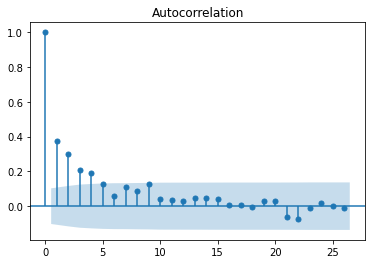

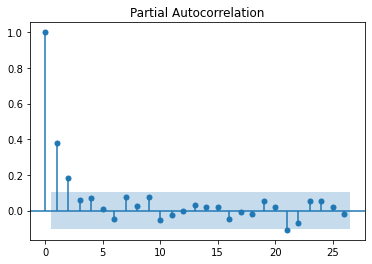

In [84]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

bimoli = pivot1['minyak goreng bimoli botol/liter']

#Array nilai acf dan pacf
acf_bimoli = acf(bimoli)
pacf_bimoli = pacf(bimoli)

#Menghitung nilai alpha yang bernilai 95% pada kurva normal = 1.96
print('Nilai CI sebesar : +/- %4.2f' %(1.96/(np.sqrt(len(bimoli)))))

#Plotting ACF dan PACF
plot_acf(bimoli);
plot_pacf(bimoli);

Dari plot ACF dan PACF, kita melihat ada daerah berwarna biru di setiap lagnya. Daerah tersebut disebut Confidence Interval, yakni rentang dua nilai untuk menentukan tingkat akurasi suatu mean dari sampel yang dianalisis. Nilai CI untuk kedua plot tersebut adalah 0.1 untuk batas atas, dan -0.1 untuk batas bawah. Kita simpan dulu penjelasan tentang kegunaan plot di atas. Selanjutnya kita melakukan splitting.

##### III. Membagi Data Point menjadi Data Train dan Data Test
Pembagian data point menjadi data train(latih) dan data test sangat penting untuk memprediksi model yang digunakan pada data point yang digunakan sebelum dilakukannya peramalan pada deret waktu selanjutnya. Pembagian ini dapat menggunakan 2 cara :
1. Manual, menggunakan slicing index dengan perbandingan yang sudah ditentukan.
2. Menggunakan class train_test_split dari library sklearn

In [85]:
#Splitting data point
def splitting(series, test_size):
    '''
    Pembagian data point menjadi data train/latih dan data test
    Parameter series: data point yang digunakan
    Parameter test_size: alokasi data testing-float
    '''
    split_point = int(len(series) * (1 - test_size))
    train_data = series.head(split_point)
    test_data = series.tail(len(series) - split_point)
    
    return train_data, test_data

#apply pada data bimoli
bimoli_train, bimoli_test = splitting(bimoli, test_size=0.3)

Text(0.5, 1.0, 'Data Test Bimoli')

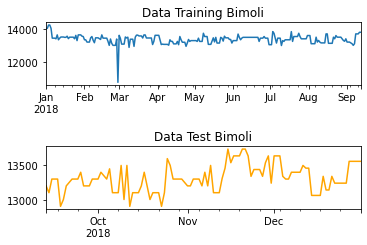

In [86]:
#plot data train dan data test
fig, ax = plt.subplots(2, 1)
plt.tight_layout(pad = 4)

bimoli_train.plot(ax = ax[0])
ax[0].set_title('Data Training Bimoli')
bimoli_test.plot(ax = ax[1], c = 'orange')
ax[1].set_title('Data Test Bimoli')

Kita telah membagi data bimoli menjadi data train dan data test. Selanjutnya, kita memasuki tahapan kedua Box-Jenkins.

 

#### Tahap Penaksiran dan Pengujian
Langkah pertama yang dilakukan dalam tahap ini ada penaksiran parameter untuk mengetahui parameter yang tepat dalam model yang dipilih. Penaksiran dapat menggunakan cara berikut:
1. Penaksiran menggunakan ACF dan PACF<br>
   Penaksiran ini dapat kita identifikasi sebagai berikut:
|      | AR(p)                | MA(q)                | ARMA(p, q) |
|------|----------------------|----------------------|------------|
| ACF  | Tails off            | Cuts off after lag q | Tails off  |
| PACF | Cuts off after lag p | Tails off            | Tails off  | 


2. Penaksiran menggunakan Information Criterion<br>
   Penaksiran kriteria ini dapat menggunakan Bayesian Information Criterion (BIC), Akaike Information Criterion (AIC), atau Schwarz Information Criterion (SIC). Semakin kecil nilai yang dihasilkan, maka model tersebut diestimasi baik. Dalam proses ini, kita menggunakan AIC dan BIC.

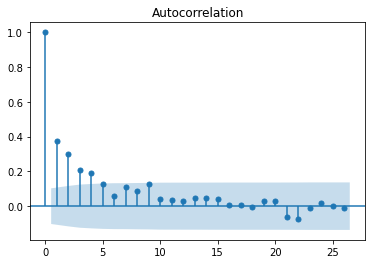

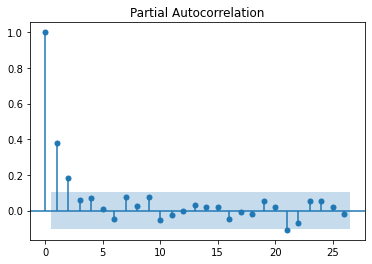

In [87]:
#Menampilkan plot ACF dan PACF
plot_acf(bimoli);
plot_pacf(bimoli);

Kita dapat melihat bahwa dalam plot ACF, nilai mengalami penurunan sedikit demi sedikit menuju ke 0 (decaying) setelah lags 1. Sedangkan PACF mengalami penurunan secara signifikan pada pada lags 2. Parameter yang dapat ditaksir dalam model AR(1) maupun AR(2). Kita perlu melakukan penaksiran lebih lanjut menggunakan Information Criterion untuk menyimpulkan penaksiran.

In [88]:
#Fungsi penaksiran menggunakan Information Criterion
from statsmodels.tsa.arima.model import ARIMA

def model_estimation(series, p, q):
    '''
    Penaksiran menggunakan Information Criterion dan evaluasi model yang ditaksir
    Parameter series: data point/data train yang digunakan
    Parameter p: nilai maksimal AR yang ditaksir
    Parameter q: nilai maksimal MA yang ditaksir
    '''
    esti = []
    
    #penaksiran dari nilai p dan q, serta evaluasi model
    for i in range(p+1):
        for j in range(q+1):
            model = ARIMA(series, order = (i, 0, j))
            result = model.fit()
            mae = np.mean(abs(result.resid))
            mape = np.mean(np.abs(result.resid) / series)
            mse = np.mean(result.resid ** 2)
            rmse = np.sqrt(mse)
            esti.append((i, j, result.aic, result.bic, mae, mape, mse, rmse))
              
    estimation_df = pd.DataFrame(esti,
                                 columns = ['p', 'q', 'AIC',
                                            'BIC', 'MAE', 'MAPE',
                                            'MSE', 'RMSE'])
    return estimation_df
            
estimation = model_estimation(bimoli_train, 4, 4)

In [89]:
estimation = estimation.sort_values(by = 'AIC', ascending = True)
print(estimation.iloc[[0]])

   p  q          AIC          BIC         MAE      MAPE           MSE  \
6  1  1  3557.449801  3571.614855  158.477134  0.012007  65283.513251   

         RMSE  
6  255.506386  


Pemilihan model yang terbaik melalui penaksiran parameter Information Criterion dapat diambil berdasarkan nilai AIC dan BIC yang terkecil. Data yang kita gunakan di atas, kita mendapatkan nilai AIC dan BIC yang terkecil pada model ARMA(1, 1)

In [90]:
#Pengujian model dengan data train dan evaluasi model yang dipilih
model = ARIMA(bimoli_train, order = (1,0,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:     minyak goreng bimoli botol/liter   No. Observations:                  255
Model:                               ARIMA(1, 0, 1)   Log Likelihood               -1774.725
Date:                              Fri, 11 Dec 2020   AIC                           3557.450
Time:                                      20:36:45   BIC                           3571.615
Sample:                                  01-01-2018   HQIC                          3563.148
                                       - 09-12-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.337e+04     47.123    283.772      0.000    1.33e+04    1.35e+04
ar.L1          0.8425      0.073     11.556      0.000       0.700       0.985
ma.L1         -0.5830      0.095     -6.143      0.000      -0.769      -0.397
sigma2      6.498e+04   2141.807     30.340      0.000    6.08e+04    6.92e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             14608.02
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -3.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Berdasarkan hasil summary di atas, kita mendapatkan persamaan ARIMA(1,0,1) sebagai berikut:

 Yt = 283.772 + 11.556Yt-1 + et - 6.143et-1
 
Kita juga mendapatkan p-value untuk AR(1) dan MA(1) bernilai 0, maka model yang ARIMA(1,0,1) signifikan. Selanjutnya kita melakukan pemeriksaan diagnosa menggunakan summary dari Ljung-Box dan Jarque-Bera.

Kita perlu melakukan uji statistik residual untuk menentukan model yang digunakan fit terhadap data train dengan menggunakan tes statistik Ljung Box dan Jaque Bera.

| Test     | Null hypothesis                | P-value                |
|------|----------------------|----------------------|
| Ljung-Box  | There are no correlations in the residual            | Prob(Q) |
| Jarque-Bera | The residuals are normally distributed | Prob(JB)            |

Hasil summary memperlihatkan nilai statistik Ljung-Box pada model kita tergolong kecil, dan menghasilkan p-value sebesar 0.87 sehingga menolak hipotesis null. Kita dapat mengasumsikan bahwa model kita dikatakan baik karena dapat menangkap pola data yang ada dengan baik. Sedangkan nilai Jarque-Bera dari model kita sebesar 14608.02 dan p-value bernilai 0, sehingga gagal menolak hipotesis null. Dengan kata lain, model kita menghasilkan residual yang berdistribusi normal.

Kita akan melakukan plotting antara data train dengan data prediksinya, juga plot diagnostic model.

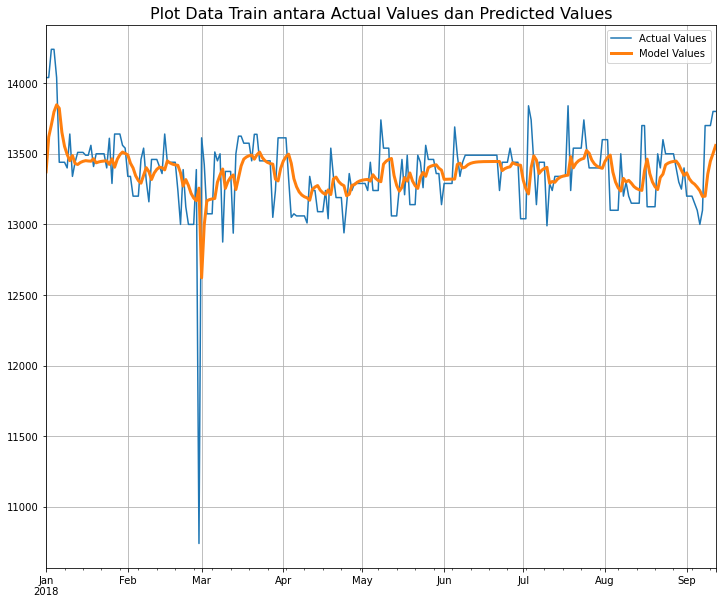

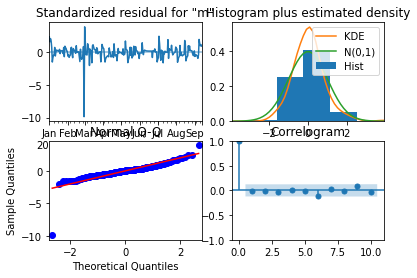

In [91]:
#plot actual values dengan model values
plt.figure(figsize =(12, 10))

bimoli_train.plot(label = 'Actual Values')
#result.fittedvalues.plot()
result.fittedvalues.plot(linewidth = 3, label = 'Model Values', grid = True)
plt.title('Plot Data Train antara Actual Values dan Predicted Values',
         size = 16)
plt.legend()

#plot diagnostics
result.plot_diagnostics();
plt.show()

Kita telah melakukan estimasi dan mendapatkan ARIMA(1,0,1) sebagai model terbaik, serta telah melakukan uji model dengan data train. Selanjutnya kita akan melakukan prediksi model menggunakan data tes.

#### Tahap Penerapan


Dalam tahap penerapan ini, kita akan menggunakan data test. Pertama, kita terapkan model yang dipilih yakni ARIMA(1,0,1) untuk melakukan prediksi terhadap data test, lalu kita akan melakukan peramalan dalam periode tertentu di masa depan.

In [92]:
#Melakukan prediksi terhadap data test
result_test = result.predict(start = len(bimoli_train),
                            end = len(bimoli_train) + len(bimoli_test)-1)

#Melakukan penghitungan error
error = bimoli_test - result_test
mae = np.mean(abs(error))
mape = np.mean(abs(error)/bimoli_test)
mse = np.mean(error ** 2)
rmse = np.sqrt(mse)

#Menghitung Confidence Interval dan Predicted Interval
upper_pi = result_test + 1.96 * error.std()
lower_pi = result_test - 1.96 * error.std()
upper_ci = result_test + 1.96 * result.resid.std()
lower_ci = result_test - 1.96 * result.resid.std()

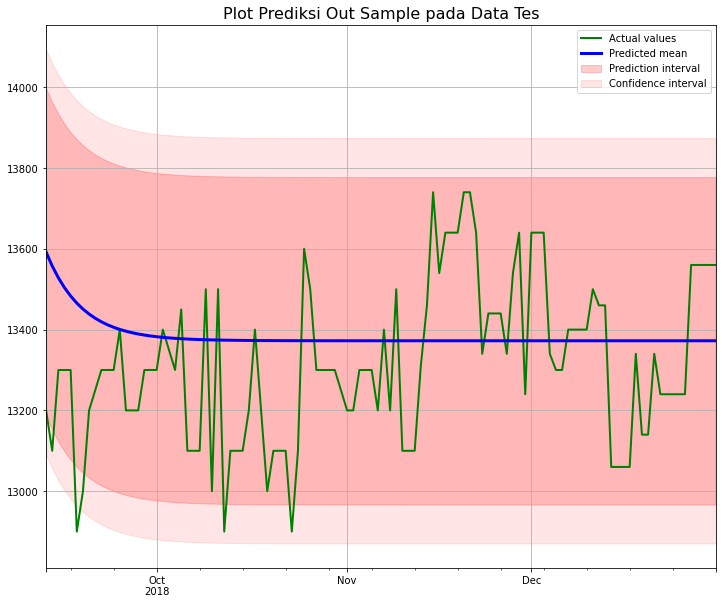

In [93]:
#plot prediksi
plt.figure(figsize=(12, 10))
bimoli_test.plot(linewidth = 2, color = 'green', 
                 label = 'Actual values', grid = True)
result_test.plot(linewidth = 3, color = 'blue',
                 label = 'Predicted mean', grid = True)
plt.fill_between(x = result_test.index,
                 y1 = lower_pi,
                 y2 = upper_pi,
                 alpha = 0.2, 
                 color = 'red', label = 'Prediction interval')
plt.fill_between(x = result_test.index,
                 y1 = lower_ci,
                 y2 = upper_ci,
                 alpha = 0.1, 
                 color = 'red', label = 'Confidence interval')

plt.title('Plot Prediksi Out Sample pada Data Tes', size = 16)
plt.legend()
plt.show()

sumber : https://stats.stackexchange.com/questions/124955/is-it-unusual-for-the-mean-to-outperform-arima/125016#125016

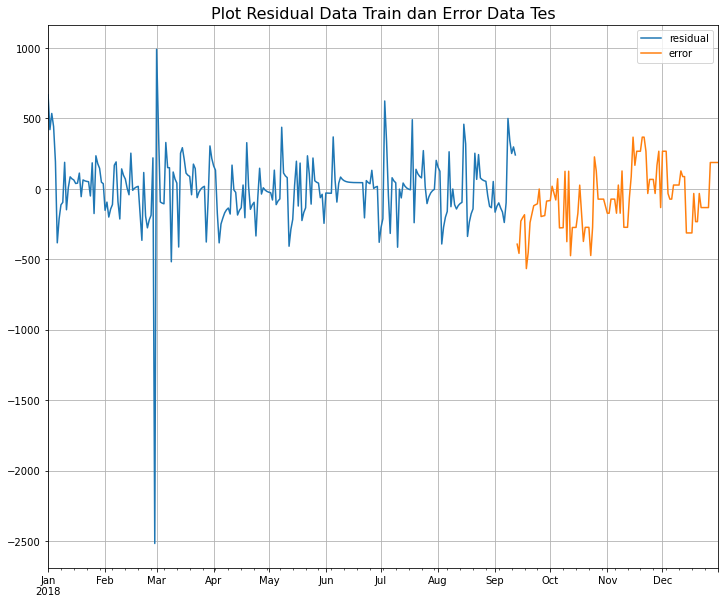

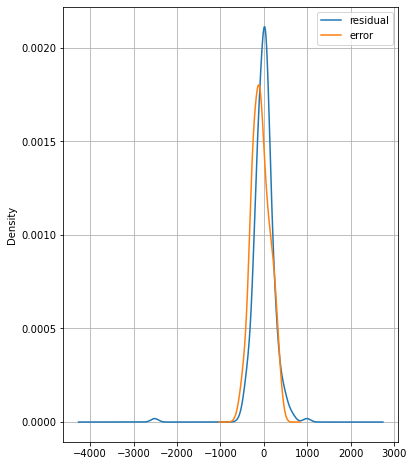

In [94]:
#Plot residuals dari model data train dan error dari tes
plt.figure(figsize = (12, 10))
result.resid.plot(label = 'residual', grid = True)
error.plot(label = 'error',grid = True)
plt.legend()
plt.title('Plot Residual Data Train dan Error Data Tes', size = 16)

plt.figure(figsize = (6, 8))
result.resid.plot(kind = 'kde', label = 'residual', grid = True)
error.plot(kind = 'kde', label = 'error', grid = True)
plt.legend()
plt.show()


In [95]:
#Menampilkan error pada model dalam melakukan prediksi terhadap data test
print('Hasil Penghitungan Error Model dalam Data Tes')
print('----------------------------------------------\n')
print('Nilai Mean Average Error(MAE)     : %.4f' %(mae))
print('Nilai Mean Percentage Error(MAPE) : %.4f' %(mape))
print('Nilai Mean Square Error(MSE)      : %.4f'%(mse))
print('Nilai Root Mean Square Error(RMSE): %.4f'%(rmse))

Hasil Penghitungan Error Model dalam Data Tes
----------------------------------------------

Nilai Mean Average Error(MAE)     : 182.4230
Nilai Mean Percentage Error(MAPE) : 0.0138
Nilai Mean Square Error(MSE)      : 47475.0884
Nilai Root Mean Square Error(RMSE): 217.8878


Berdasarkan hasil prediksi di atas, kita mendapatkan nilai Mean Average Error(MAE)/nilai rata-rata kesalahan prediksi sebesar 182.4230, dengan persentase rata-rata kesalahan/Mean Percentage Error(MAPE) sebesar 1.38%. Kita dapat menyimpulkan bahwa hasil prediksinya baik.

Demikian Time-Series Analysis yang telah kita lakukan. Mohon koreksi, kritik, dan saran agar kita senantiasa dapat belajar menjadi semakin lebih baik. Terima kasih :))))

Sumber:
1. Artikel ARIMA BPS
https://daps.bps.go.id/file_artikel/77/arima.pdf
2. Time Series Forecasting: ARIMA vs LSTM vs PROPHET
https://medium.com/analytics-vidhya/time-series-forecasting-arima-vs-lstm-vs-prophet-62241c203a3b
3. Time Series Analysis in Python – A Comprehensive Guide with Examples
https://www.machinelearningplus.com/time-series/time-series-analysis-python/